# Day 2 - Data Science Essentials Program
EMEA - Apr 2024

**Agenda for Today**

*Morning*
- Merging with Pandas
- Visualizations
    - pandas
    - matplotlib
    - seaborn
    - plotly

*Afternoon*
- Linear Regressions

**Before we get started**
- Open up `Visualization Examples.ipynb` file
- in a new ipynb file, copy and try the import codes below

In [1]:
import pandas as pd  #uses matplotlib behind, integrates really well with dataframes
import matplotlib.pyplot as plt #more custom charts
import seaborn as sns #express version of matplotlib, for more complex charts
import plotly.express as px #interactive charts

In [7]:
sp500 = pd.read_csv("StockData/SP500.csv", parse_dates=['Date'], index_col=['Date'], date_format='%m/%d/%y')
aapl = pd.read_csv("StockData/aapl.csv", parse_dates=['Date'], index_col=['Date'], date_format='%m/%d/%y')

In [8]:
# sp500.info()
# sp500.head()

## Merging Data
- `pd.concat()` --> stacking data on top of one another
- `pd.merge()` --> merging data side by side

In [26]:
tickers = ['AAPL', 'SP500', 'JPM', 'DIS', 'GS', 'IBM','NKE','WMT']
tables = [] #empty list to store all the files/tables

for ticker in tickers:
    #print(ticker)
    df = pd.read_csv(f"StockData/{ticker}.csv", parse_dates=['Date'], index_col=['Date'], date_format='%m/%d/%y')    
    df['Ticker'] = ticker
    df['Returns'] = df['Close'].pct_change()
    tables.append(df)

stockData = pd.concat(tables)

In [21]:
# stockData.info()
# stockData.tail()
stockData.groupby(['Ticker'])[['Close','Open']].max()

,Close,Open
Ticker,,
AAPL,228.360001,228.990005
DIS,121.690002,121.500000
GS,273.380005,274.339996
IBM,197.770004,198.050003
JPM,118.769997,119.129997
NKE,85.550003,86.000000
SP500,2930.750000,2936.760010
WMT,109.550003,109.139999


### Merging Data

In [34]:
sp500_metrics = pd.read_csv('ExData/sp500_Cos_ValMetrics.csv')
sp500_sectors = pd.read_csv('ExData/sp500_SectorData.csv')
sp500_data = pd.read_csv('ExData/sp500_CosData.csv')

In [40]:
# sp500_metrics.head()

In [39]:
# sp500_sectors.head()

In [43]:
#If the merged column doesn't match in spelling, use left_on, right_on
sp500_merged = sp500_metrics.merge(sp500_data, how='inner', 
                                   left_on='Symbol', right_on='symbol')
# sp500_merged

In [54]:
aapl.merge(sp500, how='right', on='Date', suffixes=('_AAPL','_SP')) #default is how='inner'

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_SP,High_SP,Low_SP,Close_SP,Adj Close_SP,Volume_SP
Date,,,,,,,,,,,,
2013-09-30,NaN,NaN,NaN,NaN,NaN,NaN,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900.0,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000.0,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300.0,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100.0,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,216.820007,221.259995,216.630005,220.789993,220.789993,27693400.0,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000
2018-09-25,219.750000,222.820007,219.699997,222.190002,222.190002,24554400.0,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000
2018-09-26,221.000000,223.750000,219.759995,220.419998,220.419998,23984700.0,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000


In [45]:
# sp500_merged = sp500_metrics.merge(sp500_sectors, how='inner', on='Symbol')
sp500_merged = sp500_metrics.merge(sp500_sectors, how='inner')
    #if you don't specify the "on", it will find any columns that have the same spelling and merge on that
sp500_merged

,Symbol,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,A,45.29B,46.9B,49.92,32.38,3.33,7.79,9.42,8.06,30.30,1.01,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
1,AAL,12.84B,47.76B,NaN,-286.00,0.05,1.00,NaN,3.72,-4.44,1.85,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934
2,AAP,13.67B,16.37B,22.45,17.10,1.55,1.27,3.87,1.52,13.20,1.38,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
3,AAPL,2.43T,2.4T,32.74,27.27,1.53,7.47,35.13,7.38,24.05,1.21,Apple,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
4,ABBV,208.26B,280.2B,40.48,8.44,2.04,4.15,15.18,5.58,11.42,0.80,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,34.88B,45.93B,31.32,24.91,1.94,5.94,NaN,7.82,22.41,1.03,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,32.74B,41.82B,57.61,17.91,1.98,4.62,2.63,5.90,20.96,1.36,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZBRA,28.55B,28.17B,44.73,29.00,2.70,6.02,11.84,5.94,29.40,1.59,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZION,8.42B,1.37B,10.45,11.85,-0.31,3.01,1.14,0.49,NaN,1.58,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [35]:
sp500_data.info()
sp500_metrics.info()
sp500_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symbol                             505 non-null    object 
 1   language                           505 non-null    object 
 2   region                             505 non-null    object 
 3   quoteType                          505 non-null    object 
 4   quoteSourceName                    505 non-null    object 
 5   triggerable                        505 non-null    bool   
 6   Currency                           505 non-null    object 
 7   firstTradeDateMilliseconds         35 non-null     float64
 8   priceHint                          505 non-null    int64  
 9   postMarketChangePercent            505 non-null    float64
 10  postMarketTime                     505 non-null    int64  
 11  sharesOutstanding                  504 non-null    float64

## Coffee break until 10:15am BST / 5:15am EST

<Axes: xlabel='Date'>

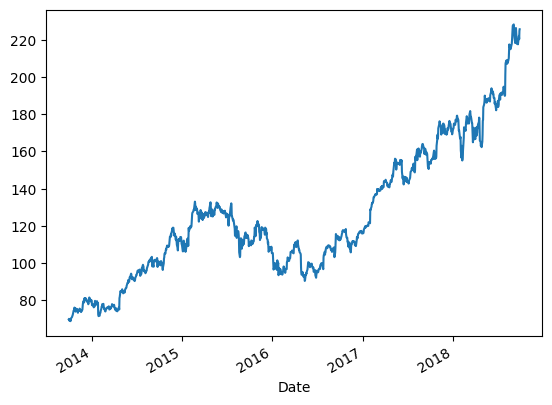

In [55]:
aapl['Close'].plot()